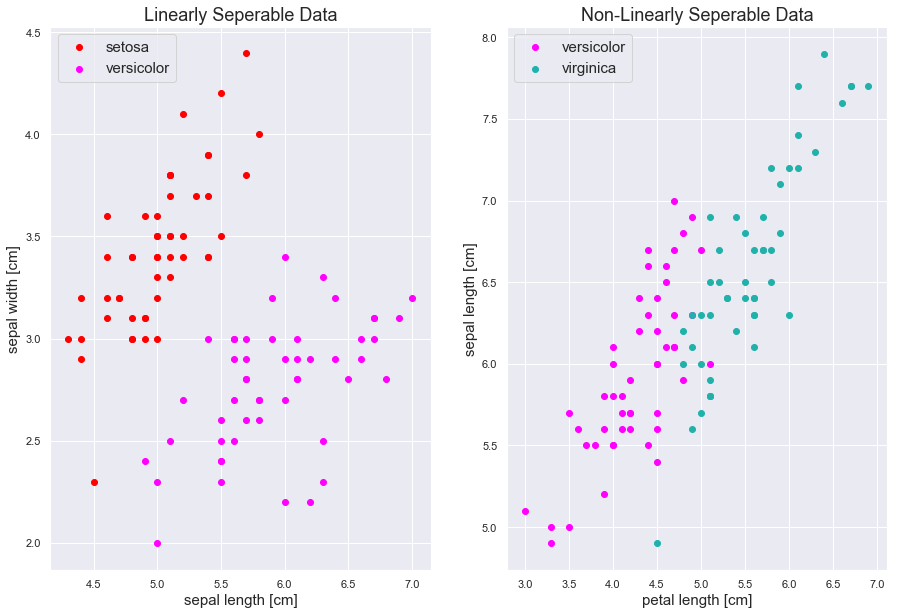

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

sns.set_theme()

df = pd.read_csv('iris.csv')

setosa = df[df.species == "setosa"]
versicolor = df[df.species == "versicolor"]
virginica = df[df.species == "virginica"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(setosa.sepal_length, 
            setosa.sepal_width, 
            color = "red", 
            label = "setosa")
ax1.scatter(versicolor.sepal_length, 
            versicolor.sepal_width, 
            color = "magenta", 
            label = "versicolor")
ax1.set_xlabel("sepal length [cm]", fontsize = 15)
ax1.set_ylabel("sepal width [cm]", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Seperable Data", fontsize = 18)


ax2.scatter(versicolor.petal_length, 
            versicolor.sepal_length, 
            color = "magenta", 
            label = "versicolor")
ax2.scatter(virginica.petal_length, 
            virginica.sepal_length, 
            color = "lightseagreen", 
            label = "virginica")
ax2.set_xlabel("petal length [cm]", fontsize = 15)
ax2.set_ylabel("sepal length [cm]", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

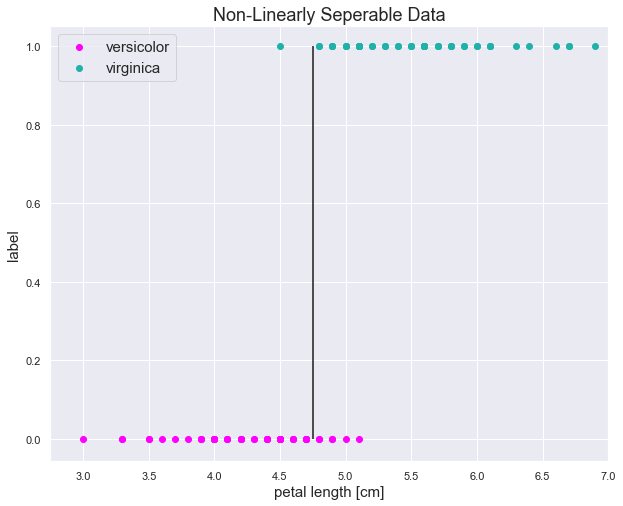

In [26]:
plt.figure(figsize = (10, 8))
plt.xlim((2.75, 7 ))
plt.scatter(versicolor.petal_length, 
            np.zeros(50), 
            color = "magenta", 
            label = "versicolor")
plt.scatter(virginica.petal_length, 
            np.ones(50), 
            color = "lightseagreen", 
            label = "virginica")
plt.vlines(4.75, 0.0, 1.0)
plt.xlabel("petal length [cm]", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

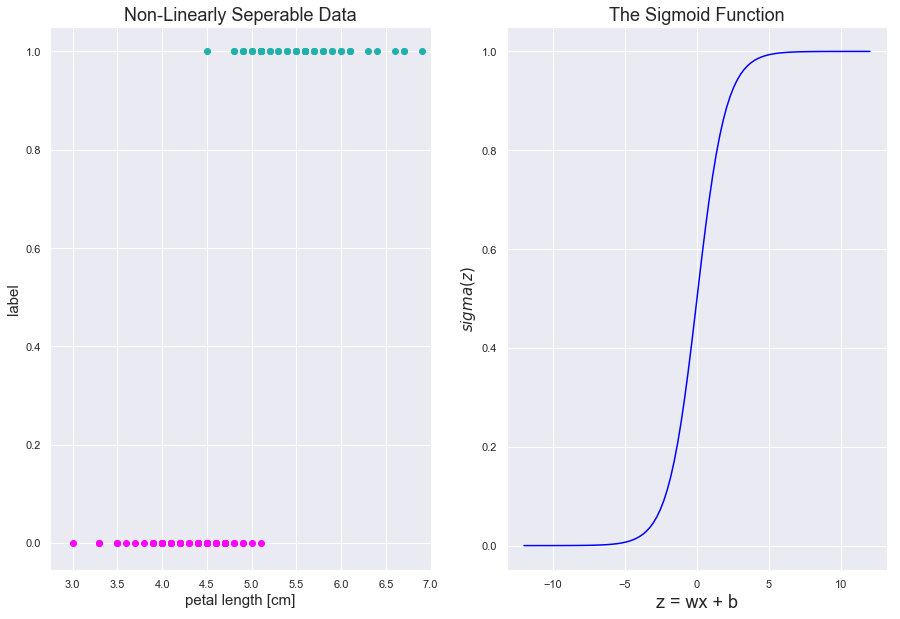

In [27]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_xlim((2.75, 7))
ax1.scatter(versicolor.petal_length, 
            np.zeros(50), 
            color = "magenta", 
            label = "versicolor")
ax1.scatter(virginica.petal_length, 
            np.ones(50), 
            color = "lightseagreen", 
            label = "virginica")
ax1.set_xlabel("petal length [cm]", fontsize = 15)
ax1.set_ylabel("label", fontsize = 15)
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)


domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("The Sigmoid Function", fontsize = 18)
plt.show()

In [28]:
class SingleNeuron(object):
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]
        
        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [29]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = SingleNeuron(sigmoid, cross_entropy_loss)

X = df.iloc[50:].petal_length.values
X = X.reshape(-1, 1)
y = np.where(df.iloc[50:].species == "versicolor", 0, 1)

node.train(X, y, alpha = 0.01, epochs = 10_000)

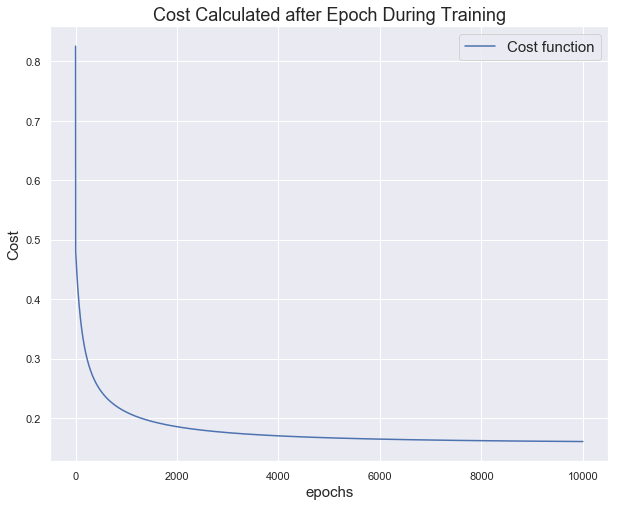

In [43]:
node.plot_cost_function()
plt.show()

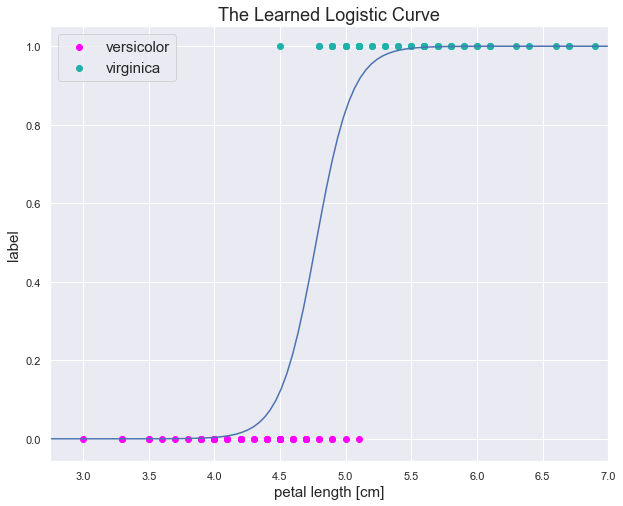

In [31]:
plt.figure(figsize = (10, 8))
plt.xlim((2.75, 7 ))
plt.scatter(versicolor.petal_length, 
            np.zeros(50), 
            color = "magenta", 
            label = "versicolor")
plt.scatter(virginica.petal_length, 
            np.ones(50), 
            color = "lightseagreen", 
            label = "virginica")

domain = np.linspace(2.75, 7, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("petal length [cm]", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

In [44]:
node.predict(X)

array([3.67271861e-01, 1.19902926e-01, 7.12072850e-01, 3.62280306e-03,
       2.19489443e-01, 1.19902926e-01, 3.67271861e-01, 2.27751630e-05,
       2.19489443e-01, 1.75841327e-03, 9.70287749e-05, 1.52551322e-02,
       3.62280306e-03, 3.67271861e-01, 2.00258685e-04, 6.19163195e-02,
       1.19902926e-01, 7.44919501e-03, 1.19902926e-01, 1.75841327e-03,
       5.45069118e-01, 3.62280306e-03, 7.12072850e-01, 3.67271861e-01,
       3.09854770e-02, 6.19163195e-02, 5.45069118e-01, 8.36194069e-01,
       1.19902926e-01, 9.70287749e-05, 8.52666454e-04, 4.13270565e-04,
       1.75841327e-03, 9.13321649e-01, 1.19902926e-01, 1.19902926e-01,
       3.67271861e-01, 6.19163195e-02, 7.44919501e-03, 3.62280306e-03,
       6.19163195e-02, 2.19489443e-01, 3.62280306e-03, 2.27751630e-05,
       1.52551322e-02, 1.52551322e-02, 1.52551322e-02, 3.09854770e-02,
       2.58978259e-06, 7.44919501e-03, 9.99860490e-01, 9.13321649e-01,
       9.99712077e-01, 9.97473554e-01, 9.99405873e-01, 9.99998196e-01,
      

In [45]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.07


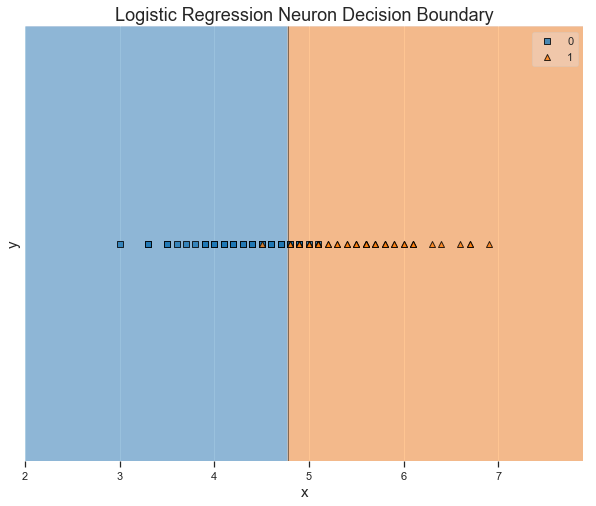

In [34]:
node.plot_decision_boundary(X, y)
plt.show()

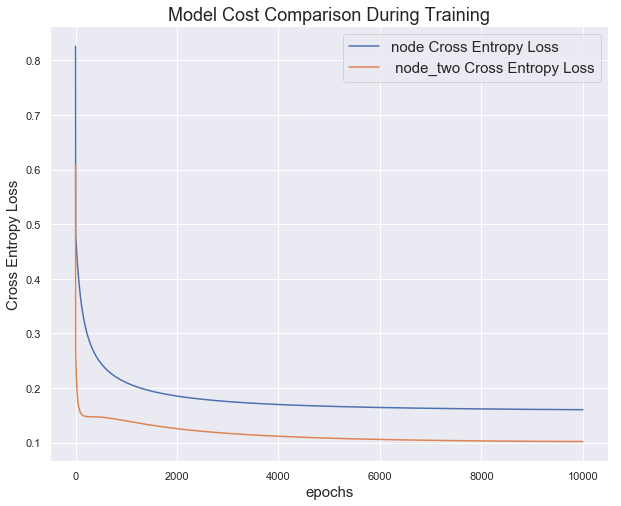

In [35]:
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_two = df.iloc[50:][["petal_length", "sepal_length"]].values

# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, alpha = 0.01, epochs = 10_000)


plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label = " node_two Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)

plt.show()

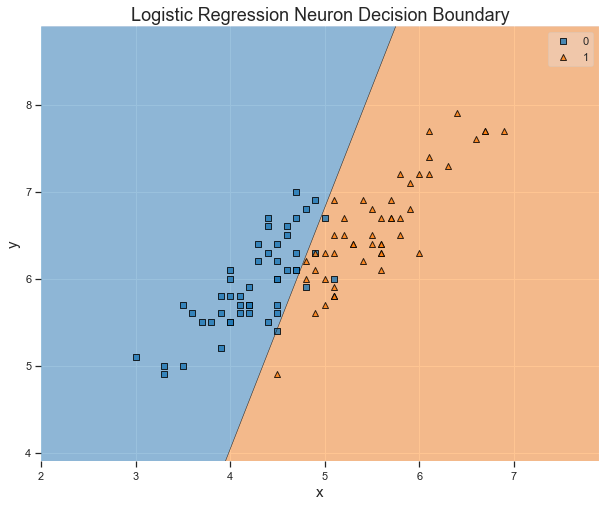

In [46]:
node_two.plot_decision_boundary(X_two, y)

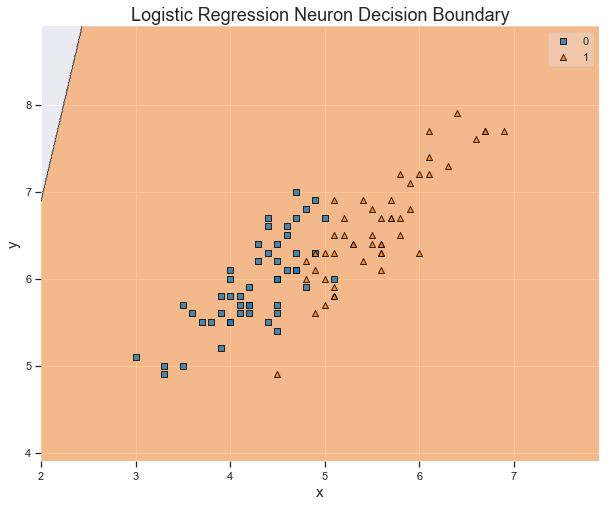

In [47]:
def sign(z):
    return np.sign(z)

def MSE(y_hat, y):
    return .5*(y_hat - y)**2

# Instantiate a new single neuron.
node_three = SingleNeuron(sign, MSE)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_three = df.iloc[50:][["petal_length", "sepal_length"]].values

y_three = np.where(df.iloc[50:]["species"] == "versicolor", 0, 1)


# Train the new single neuron model on the new feature vectors.
node_three.train(X_three, y_three, alpha = 0.001, epochs = 20_000)

node_three.plot_decision_boundary(X_three, y_three)
plt.show()

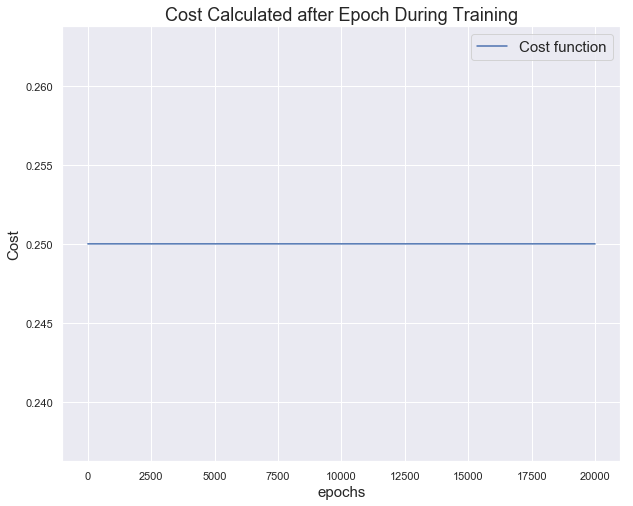

In [48]:
node_three.plot_cost_function()